# Wine Quality Prediction
## Overview
- This project explore the use of supervised machine learning algorithms to predict wine quality based on physicochemical test results.
- It involves end-to-end handling - data preprocessing, exploratory data analysis, model training, evaluation, and result visualization.
## Objectives
- Gain hands-on experience with Python data science libraries (NumPy, Pandas, Matplotlib, Seaborn).
- Implement basic machine learning models using scikit-learn.
- Understand model evaluation metrics and bias-variance tradeoff.
- Conduct basic analytics and visualization to interpret model outputs.
## Dataset
- Source - [UCI Machine Learning Repository - Wine Quality Dataset](https://archive.ics.uci.edu/dataset/186/wine+quality)
- Description - Contains physicochemical properties (e.g., pH, alcohol, citric acid) of red wine samples with corresponding quality ratings (score between 0–10).

In [5]:
# Libraries and Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Settings
sns.set_style('whitegrid')
%matplotlib inline

In [6]:
# Data Loading
data = pd.read_csv('data/winequality-red.csv', delimiter=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## EDA (Exploratory Data Analysis)

In [7]:
# Basic Overview
print('INFO','\n',data.info,'\n')
print('DESCRIBE','\n',data.describe(),'\n')
print('SHAPE','\n',data.shape,'\n')
print('DTYPES','\n',data.dtypes,'\n')
print('HEAD','\n',data.head())

INFO 
 <bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6    

In [8]:
# Null Check
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [9]:
# Basic Statistics
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [10]:
print(data.columns.tolist())

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


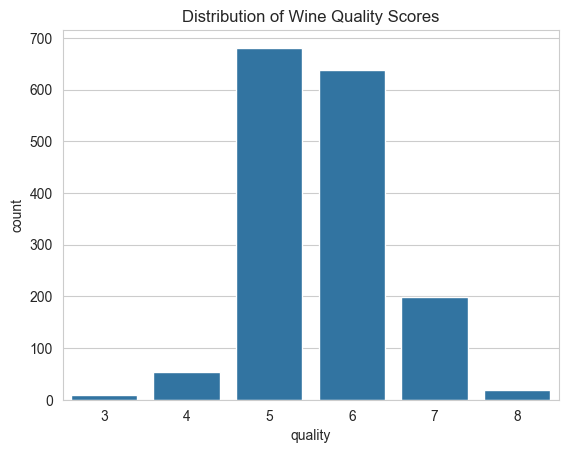

In [11]:
# Target Variable Distribution
sns.countplot(x='quality', data=data)
plt.title('Distribution of Wine Quality Scores')
plt.show()

In [12]:
data['quality'].value_counts().sort_index()

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

- The dataset is mostly boring wines.
- The model will have to work hard to tell apart "mediocre 5" from "slightly better 6" which will be tricky.
- Since the dataset is filled with mediocre wines, the good and trashy wines are both rare, telling the difference between two average wines is subtle.
- The above plot is simple but critical since its showing how the thing we want to predict is distributed across the dataset.

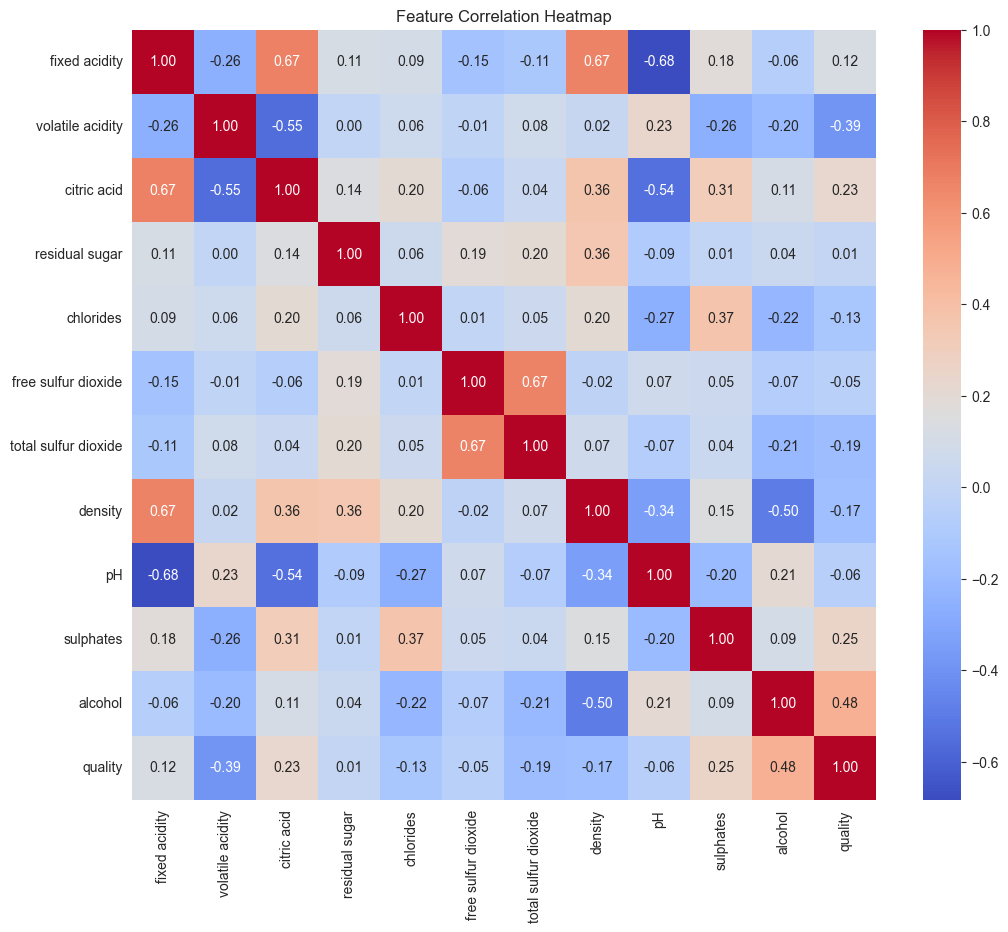

In [13]:
# Correlation Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [14]:
print(data.corr()) # the above heatmap but in numbers, a table

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

In [15]:
print(data.corr()['quality'].sort_values(ascending=False)) # correlations just with quality

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


| Rank | Feature | Correlation | Meaning |
|:-----|:--------|:------------|:--------|
| 1 | alcohol | 0.476166 | Higher alochol &rarr; Better wine |
| 2 | sulphates | 0.251397 | More sulphates &rarr; slightly better wine |
| 3 | citric acid | 0.226373 | More citric acid &rarr; better wine |
| 4 | density | -0.174919 | Higher density &rarr; worse wine |
| 5 | total sulfur dioxide | -0.185100 | More sulfur dioxide &rarr; worse wine |
| 6 | volatile acidity | -0.390558 | Higer volatile acidity &rarr; worse wine |

- Not randomly guessing while building ML model.
- Knowing which feature has predictive power.
- Which feature are positively or negatively influencing the quality.
- Identified top features like alcohol, sulphates, volatile acidity, citric acid, density, sulfur dioxide.
- Alcohol is most important in predicting wine quality.
- Volatile acidity worsen the quality hard.
- Sulphates and citric acid do help a bit.
- Density and sulfur dioxide both totally worsen the quality a little.
- These points above implies that alcohol, sulphates, citric acid have positive effects where as volatile acidity, density, and sulfur dioxide have negative effects on the quality

- The two features which are strongly related to each other.
- Features can be strongly correlated (directly or inversely) or weakly with no correlation at all.
- This helps pick which features matter, which features are redundant and which features are most related to the target, i.e., 'quality'.
- Features which are highly correlated can confuse models, features which are redundant add noise and complexity making the models slower and possibly less accurate and features which are good boost the predictive power where in the later case, could use feature selection to keep the best, non-redundant features and dropping the junk.
- The heatmap plots against the features which are useful and which are just clutter. If two features are highly correlated its not need, for example `density` and `residual sugar`. The features correlating well with `quality` is valuable for prediction. If a feature has no meaningful correlation with anything, that feature is junk.
- Lets look at the highest positive/negative correlation with 'quality' and any features that are redundantly similar to others.

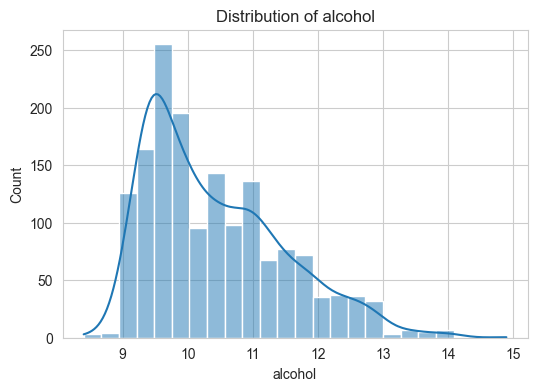

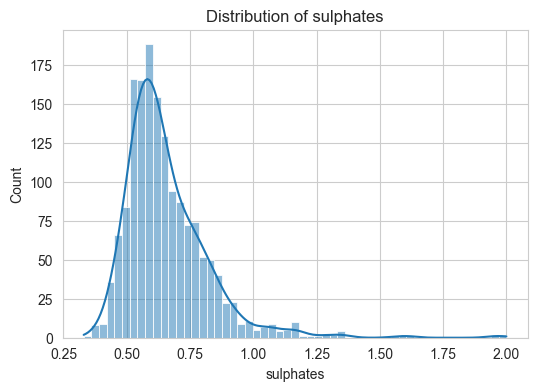

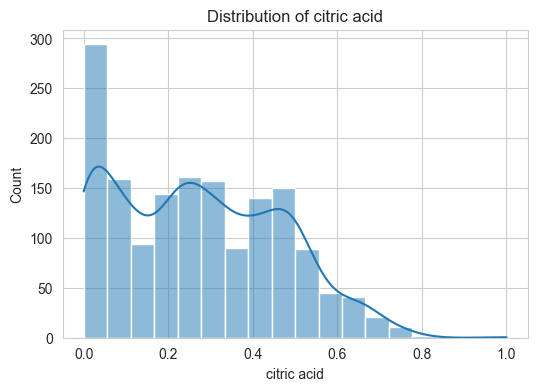

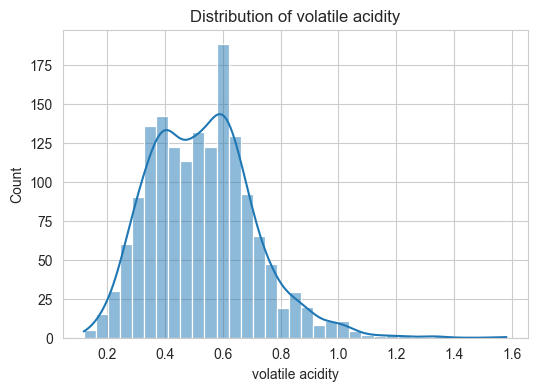

In [16]:
# Feature Distributions
features = ['alcohol', 'sulphates', 'citric acid', 'volatile acidity']
for feature in features:
    plt.figure(figsize=(6,4))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

- These feature distributions plots helps understand,
  - If the plot is symmetric or skewed (skewed could be right or left), like alcohol distribution is right-skewed meaning tails to the right.
  - Does the plot have multiple peaks (multi-modal) or single peak (uni-modal), one clear peak meaning most the wine's quality is average depending on the skewed where multi-modal like something in citric acid distribution which has multiple peak leaning sideways because different wine making processes add or remove citric acid differently.
  - Do notice if any suspicious outliers, like any isolated bars. Looking at the alcohol distribution no hard spikes way off the tail. These outliers would break the dataset if they are violent, in the above distribution only some high alcohol wines tailing off the right.

## Preprocessing

In [17]:
# Feature Scaling/Normalization

# Split feature and target
X = data.drop('quality', axis=1)
y = data['quality']

print('X (features):', '\n', X.head(), '\n')
print('y (target):', '\n', y.head())

X (features): 
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4    

In [18]:
# Train-Test split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Scaling (StandardScaler)

scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)

## Model Training And Evaulation

In [20]:
# Defining models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=24),
    "k-NN": KNeighborsRegressor()
}

# Store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": round(mse, 3), "R2": round(r2, 3)}

## Results and Visualization

In [22]:
# Display results as a table
results_df = pd.DataFrame(results).T
print(results_df)

                     MSE     R2
Linear Regression  0.390  0.403
Decision Tree      0.644  0.015
k-NN               0.435  0.335


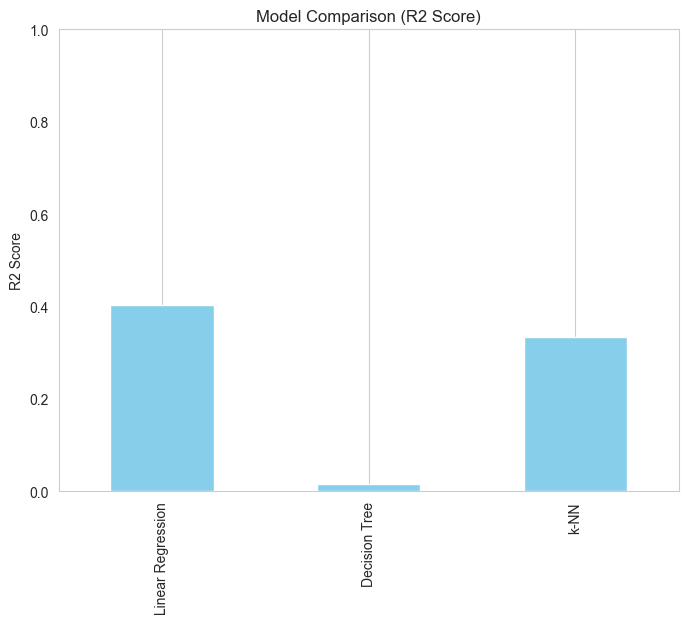

In [24]:
# Plot R2 scores
results_df['R2'].plot(kind='bar', figsize=(8,6), color='skyblue')
plt.title('Model Comparison (R2 Score)')
plt.ylabel('R2 Score')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

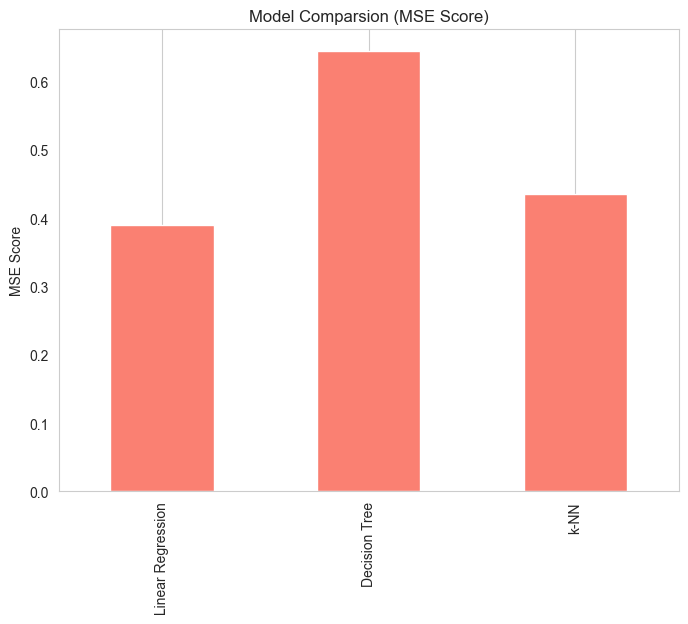

In [26]:
# Plot MSE Scores
results_df['MSE'].plot(kind='bar', figsize=(8,6), color='salmon')
plt.title('Model Comparsion (MSE Score)')
plt.ylabel('MSE Score')
plt.grid(axis='y')
plt.show()

### Model Training Results (R2 Score)
- Linear Regression ~40% of the variation.
- K-NN ~33%.
- Decision Tree basically the least ~1.5%.
- Visualization confirms linear regression > k-NN > Decision Tree.
- Wine quality is hard to predict with simple, default machine learning models thats being used here.